# Correlation Analysis in Multi-Modal Data

Given a multi-modal dataset, this toolbox estimates the following:
* The number of correlated components across the datasets.
* The structure of the correlated components

The toolbox provides options to create custom correlation structures and generate synthetic data based on the prescribed correlation structure. Additionally, pre-existing data can also be used to analyze the latent correlation structure within the modalities.

This tutorial provides detailed information regarding the usage and the multiple options offered by the toolbox.




Firstly, some imports and path settings.

In [1]:
import os , sys
from pathlib import Path
sys.path.append(str(Path(os.path.abspath(os.curdir)).parent.parent))
from multipleDatasets.correlation_analysis import MultidimensionalCorrelationAnalysis
from multipleDatasets.visualization.graph_visu import visualization

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
%matplotlib inline


##  Case 1: Basic synthetic structure with default parametes



`MultidimensionalCorrelationAnalysis` object is the interface to configure the user inputs.
In this basic example, the default number of datasets and signals i.e. 4 datasets with 4 signals each is considered. The user has to only provide the correlation structure in the form of a list of percentage values.
In the below example, the `corr_input=[100,75]` implies that one signal is correlated across all datasets(100%) and one other signal is correlated across 75% of the datasets.
Upon calling the `generate_structure()` function, it requests for a user input asking whether the generated structure is suitable or not. If `n` is entered it generates a new structure based on the original `corr_inut` information.

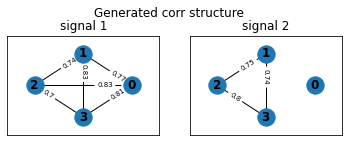

Continue with generated correlation structure?: y/n y


SNR val =  15
iteration =  0


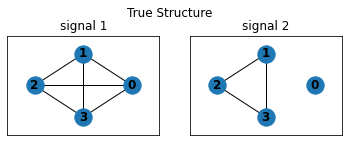

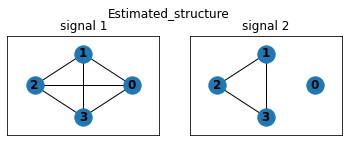

In [4]:
estimator1 = MultidimensionalCorrelationAnalysis(corr_input=[100,75])

corr_truth = estimator1.generate_structure(disp_struc=True)
corr_estimate, d_hat = estimator1.run(disp_struc=True)


## Case 2 : Configure number of datasets and signals
The below example demonstrates the steps to configure the number of datasets, the number of signals in each dataset and the number of samples in each dataset. 
Note: A higher number of datasamples improves the accuracy of estimation.

The below example also illustrates the usage of the visualization module. The `visualization` class accepts the pairwise-correlation matrix and the number of datasets as the input and visualizes the correlation structure in the form of a graph with nodes as the datasets and edges indicating whethere there is a correlation between the two nodes for the corresponding signal.


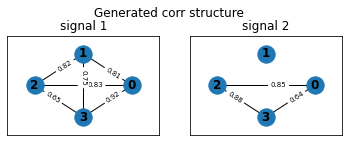

Continue with generated correlation structure?: y/n y


SNR val =  15
iteration =  0


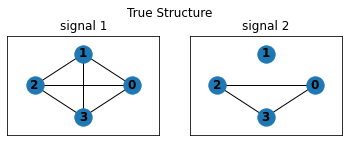

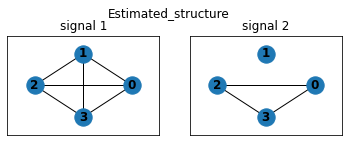

In [8]:
n_sets=4
estimator2 = MultidimensionalCorrelationAnalysis(
                                                 n_sets = n_sets,      # number of datasets
                                                 signum = 3,      # number of signals per dataset
                                                 M = 500,         # number of samples per dataset
                                                 tot_dims=3, # dimension of the signal after mixing
                                                 percentage_corr=True, # Flag to indicate percentage inputs
                                                 corr_input=[100, 75]  # Correlation of the i'th signal as list
                                                )
                                                 
corr_truth = estimator2.generate_structure(disp_struc=True)
corr_estimate, d_hat = estimator2.run(disp_struc=False)  

viz = visualization(graph_matrix=corr_truth,  num_dataset=n_sets, label_edge=False)
viz.visualize("True Structure")

viz_op = visualization(graph_matrix=corr_estimate, num_dataset=n_sets, label_edge=False)
viz_op.visualize("Estimated_structure")

## Case 3: Configure additional parameters

The below example demonstrates how additonal advanced parameters can be configured for a more detailed analysis:
- `full_corr = n` sets `n` signals to be fully correlated across all datasets.
- `corr_across` accepts a list of correlation values whose elements specify the number of datasets across     which a signal is to be correlated

Additionally, an analysis can be performed on multiple iterations for different SNR values, thus tracking the performance at different SNR's. This can be set as follows:
- `SNR_vec` accepts a list of SNR values for which the test has to be performed.
- `num_iter` sets the number of times the test is run for each SNR value. Performance for a particular SNR is averaged over `num_iter`.

The performance for different SNR values is measured using the Precision and Recall metric and plotted on a graph. The performance improves for higher SNR as expected.

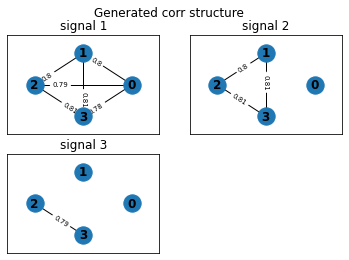

Continue with generated correlation structure?: y/n y


SNR val =  -12
iteration =  0
iteration =  1
iteration =  2
SNR val =  -5
iteration =  0
iteration =  1
iteration =  2
SNR val =  10
iteration =  0
iteration =  1
iteration =  2
SNR val =  16
iteration =  0
iteration =  1
iteration =  2


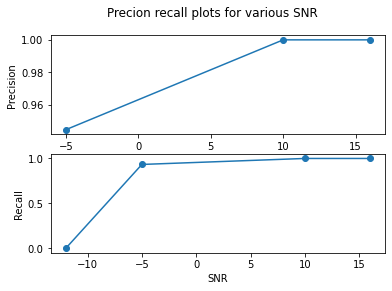

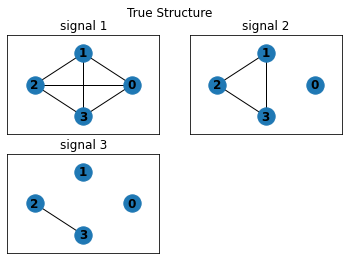

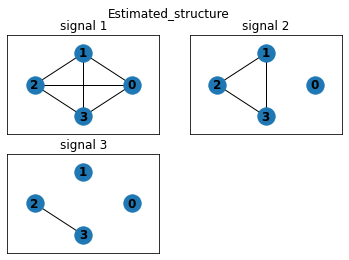

In [15]:
n_sets=4
estimator3 = MultidimensionalCorrelationAnalysis(
                                                 n_sets = 4,      # number of datasets
                                                 signum = 4,      # number of signals per dataset
                                                 M = 500,         # number of samples per dataset
                                                 tot_dims=4,# dimension of the signal after mixing
                                                 percentage_corr=False, # Flag to indicate percentage inputs
                                                 full_corr=1,
                                                 corr_across=[3,2],
                                                 corr_means=[0.8,0.8,0.8],
                                                 corr_std=[0.01,0.01,0.01],
                                                 SNR_vec=[-12,-5,10,16],
                                                 num_iter=3
    
                                                )
                                                 
corr_truth = estimator3.generate_structure(disp_struc=True)
corr_estimate, d_hat = estimator3.run(disp_struc=False)   # returns estimate of the final iteration only
viz = visualization(graph_matrix=corr_truth,  num_dataset=n_sets, label_edge=False)
viz.visualize("True Structure")

viz_op = visualization(graph_matrix=corr_estimate, num_dataset=n_sets, label_edge=False)
viz_op.visualize("Estimated_structure")
